In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.font_manager._rebuild()

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
import urllib, json

In [3]:
year = 2001

In [4]:
info_json_url = urllib.request.urlopen('https://api.collegefootballdata.com/teams/fbs?year=%s'%year)
teamInfo = json.loads(info_json_url.read())
teamInfo = pd.DataFrame(teamInfo)

In [5]:
Ranks = pd.read_csv('%s/Ranks.csv'%year,index_col=0)
PCT = pd.read_csv('%s/PCT.csv'%year,index_col=0)

In [6]:
Ranks = Ranks.sort_values(str(max([int(r) for r in Ranks.columns])))

In [7]:
Ranks.columns

Index(['4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17'],
      dtype='object')

In [8]:
TeamList = Ranks.index

In [9]:
TeamArr = np.array(TeamList)

In [10]:
TeamArr

array(['Miami', 'Oregon', 'Florida', 'Tennessee', 'Texas', 'LSU',
       'Colorado', 'Nebraska', 'Oklahoma', 'Syracuse', 'Illinois',
       'Washington State', 'Maryland', 'BYU', 'Marshall', 'Louisville',
       'Florida State', 'Toledo', 'Stanford', 'South Carolina',
       'Fresno State', "Hawai'i", 'Washington', 'Boston College',
       'Bowling Green', 'Michigan', 'Pittsburgh', 'Georgia', 'Utah',
       'North Carolina', 'Texas A&M', 'Virginia Tech', 'South Florida',
       'Alabama', 'Boise State', 'UCLA', 'Arkansas', 'Georgia Tech',
       'Middle Tennessee', 'Troy', 'Colorado State', 'Rice', 'Ohio State',
       'Texas Tech', 'Iowa', 'Ole Miss', 'Clemson', 'Michigan State',
       'Auburn', 'Miami (OH)', 'Iowa State', 'Kansas State', 'NC State',
       'USC', 'Cincinnati', 'Kent State', 'Indiana', 'New Mexico',
       'Wake Forest', 'Penn State', 'Louisiana Tech', 'Northern Illinois',
       'UCF', 'Notre Dame', 'UAB', 'TCU', 'Oregon State', 'East Carolina',
       'Air Force', 

In [11]:
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'

In [12]:
teamInfo

,id,school,mascot,abbreviation,alt_name1,alt_name2,alt_name3,conference,division,color,alt_color,logos
0,2005,Air Force,Falcons,AFA,None,AFA,Air Force,Mountain West,None,#004a7b,#ffffff,[http://a.espncdn.com/i/teamlogos/ncaa/500/200...
1,2006,Akron,Zips,AKR,None,AKR,Akron,Mid-American,East,#00285e,#84754e,[http://a.espncdn.com/i/teamlogos/ncaa/500/200...
2,333,Alabama,Crimson Tide,ALA,None,ALA,Alabama,SEC,West,#690014,#f1f2f3,[http://a.espncdn.com/i/teamlogos/ncaa/500/333...
3,12,Arizona,Wildcats,ARIZ,None,ARIZ,Arizona,Pac-10,None,#002449,#00205b,[http://a.espncdn.com/i/teamlogos/ncaa/500/12....
4,9,Arizona State,Sun Devils,ASU,None,ASU,Arizona State,Pac-10,None,#942139,#f1f2f3,[http://a.espncdn.com/i/teamlogos/ncaa/500/9.p...
...,...,...,...,...,...,...,...,...,...,...,...,...
112,265,Washington State,Cougars,WSU,None,WSU,Washington St,Pac-10,None,#94022a,#6a747c,[http://a.espncdn.com/i/teamlogos/ncaa/500/265...
113,2711,Western Michigan,Broncos,WMU,None,WMU,W Michigan,Mid-American,West,#B59966,#bfa979,[http://a.espncdn.com/i/teamlogos/ncaa/500/271...
114,277,West Virginia,Mountaineers,WVU,None,WVU,West Virginia,Big East,None,#FFC600,#eaaa00,[http://a.espncdn.com/i/teamlogos/ncaa/500/277...
115,275,Wisconsin,Badgers,WIS,None,WIS,Wisconsin,Big Ten,None,#A00001,#f7f7f7,[http://a.espncdn.com/i/teamlogos/ncaa/500/275...


In [13]:
teamInfo[teamInfo.school == 'Montana']

,id,school,mascot,abbreviation,alt_name1,alt_name2,alt_name3,conference,division,color,alt_color,logos


In [70]:
def plotTeamRank(team,show=False):
    plt.figure(figsize=(12,5),facecolor='w')
    # plt.subplot(121)
    plt.gca().invert_yaxis()
    plt.title(team,size=18,fontweight='bold')
#     plt.title('Rankings over the 2019 CFB Season',size=14)
    plt.xlabel('Week',weight='medium')
    plt.ylabel('Rank',weight='medium')
    plt.xticks(fontname = 'NovaMono',weight='medium')
    plt.yticks(fontname = 'NovaMono',weight='medium')
    teamColor = teamInfo[teamInfo.school == team].color.item()
    teamAltColor = teamInfo[teamInfo.school == team].alt_color.item()
    plt.plot(Ranks.loc[team],c=teamColor,label=team,lw=5,
             marker = 'o',markersize=10,markerfacecolor=teamAltColor,markeredgewidth=2.5,markeredgecolor=teamColor)
    plt.tight_layout()
    if not os.path.exists(str(year)+'/Rank Graphs'):
            os.mkdir(str(year)+'/Rank Graphs')
    plt.savefig('%s/Rank Graphs/%s_%s_Ranks.png'%(year,team,year))
    if show:
        plt.show()
    else:
        plt.close()

In [43]:
for team in TeamList:
    plotTeamRank(team)

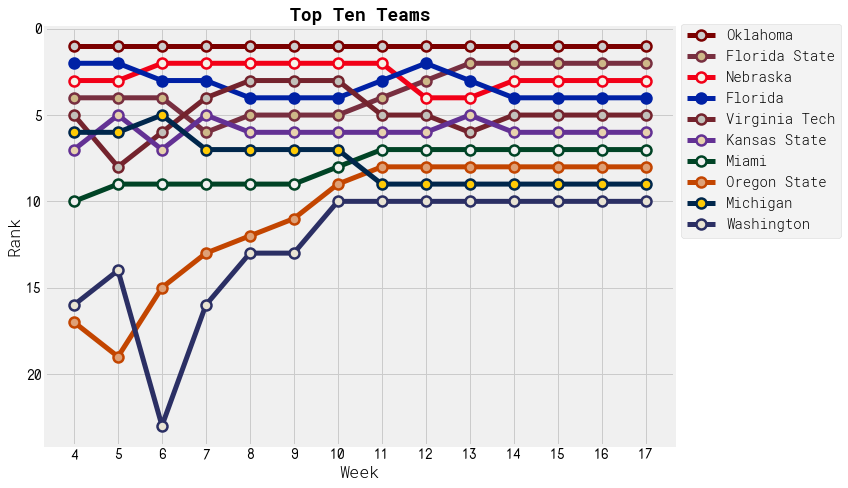

In [54]:
plt.figure(figsize=(12,7),facecolor='w')
# plt.subplot(121)
plt.gca().invert_yaxis()
plt.title('Top Ten Teams',size=18,fontweight='bold')
# plt.title('Rankings over the 2019 CFB Season',size=14)
plt.xlabel('Week',weight='medium')
plt.ylabel('Rank',weight='medium')
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
teamColor = teamInfo[teamInfo.school == team].color.item()
for team in TeamList[:10]:
    teamColor = teamInfo[teamInfo.school == team].color.item()
    teamAltColor = teamInfo[teamInfo.school == team].alt_color.item()
    plt.plot(Ranks.loc[team],c=teamColor,label=team,lw=5,
             marker = 'o',markersize=10,markerfacecolor=teamAltColor,markeredgewidth=2.5,markeredgecolor=teamColor)
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('%s/topten.png'%year)
plt.show()

In [55]:
totalRise = Ranks['4'] - Ranks['15']
totalRise = totalRise.sort_values()
biggestRises = totalRise.tail(5)
biggestFalls = totalRise.head(5)

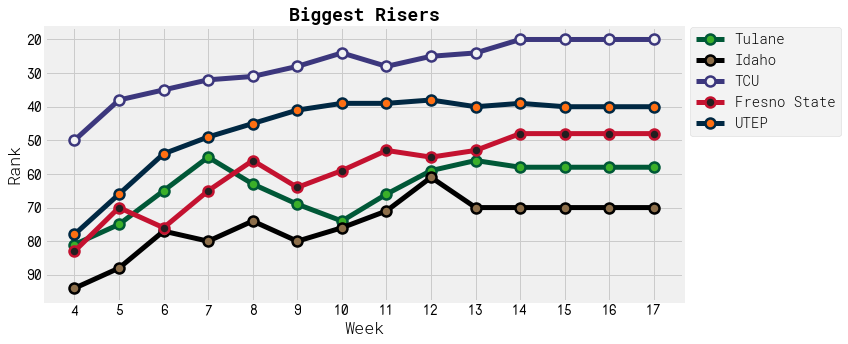

In [56]:
plt.figure(figsize=(12,5),facecolor='w')
# plt.subplot(121)
plt.gca().invert_yaxis()
plt.title('Biggest Risers',size=18,fontweight='bold')
# plt.title('Rankings over the 2019 CFB Season',size=14)
plt.xlabel('Week',weight='medium')
plt.ylabel('Rank',weight='medium')
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
teamColor = teamInfo[teamInfo.school == team].color.item()
for team in biggestRises.index:
    teamColor = teamInfo[teamInfo.school == team].color.item()
    teamAltColor = teamInfo[teamInfo.school == team].alt_color.item()
    plt.plot(Ranks.loc[team],c=teamColor,label=team,lw=5,
             marker = 'o',markersize=10,markerfacecolor=teamAltColor,markeredgewidth=2.5,markeredgecolor=teamColor)
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('%s/risers.png'%year)
plt.show()

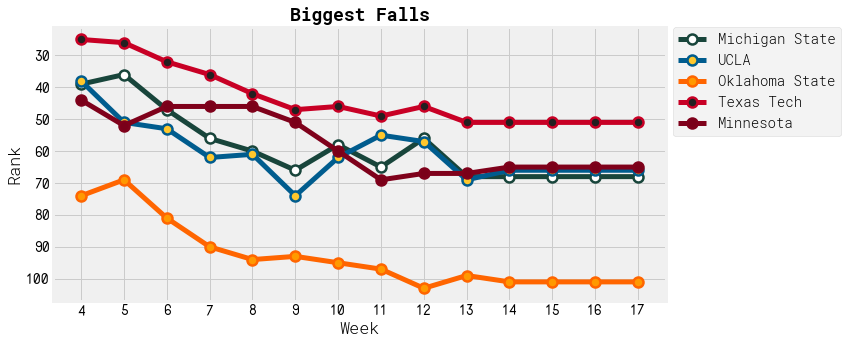

In [57]:
plt.figure(figsize=(12,5),facecolor='w')
# plt.subplot(121)
plt.gca().invert_yaxis()
plt.title('Biggest Falls',size=18,fontweight='bold')
# plt.title('Rankings over the 2019 CFB Season',size=14)
plt.xlabel('Week',weight='medium')
plt.ylabel('Rank',weight='medium')
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
teamColor = teamInfo[teamInfo.school == team].color.item()
for team in biggestFalls.index:
    teamColor = teamInfo[teamInfo.school == team].color.item()
    teamAltColor = teamInfo[teamInfo.school == team].alt_color.item()
    plt.plot(Ranks.loc[team],c=teamColor,label=team,lw=5,
             marker = 'o',markersize=10,markerfacecolor=teamAltColor,markeredgewidth=2.5,markeredgecolor=teamColor)
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.tight_layout()
plt.savefig('%s/falls.png'%year)
plt.show()

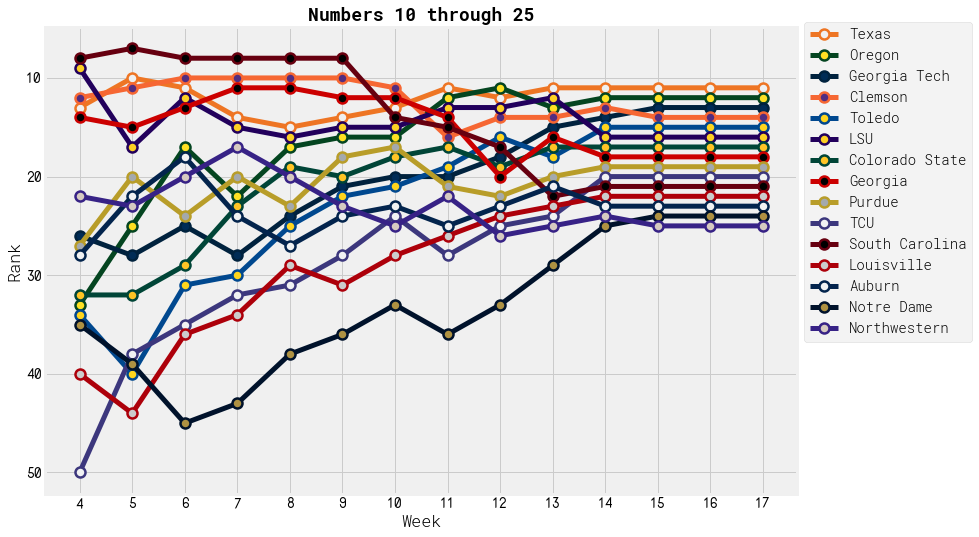

In [58]:
plt.figure(figsize=(12,8),facecolor='w')
# plt.subplot(121)
plt.gca().invert_yaxis()
plt.title('Numbers 10 through 25',size=18,fontweight='bold')
# plt.title('Rankings over the 2019 CFB Season',size=14)
plt.xlabel('Week',weight='medium')
plt.ylabel('Rank',weight='medium')
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
teamColor = teamInfo[teamInfo.school == team].color.item()
for team in TeamList[10:25]:
    teamColor = teamInfo[teamInfo.school == team].color.item()
    teamAltColor = teamInfo[teamInfo.school == team].alt_color.item()
    plt.plot(Ranks.loc[team],c=teamColor,label=team,lw=5,
             marker = 'o',markersize=10,markerfacecolor=teamAltColor,markeredgewidth=2.5,markeredgecolor=teamColor)
plt.legend(bbox_to_anchor=(1, 1.025), loc='upper left', ncol=1)
plt.show()